## 선형회귀

`````
    최소 제곱법 : y = ax+ b에서 기울기 a를 구하는 방법이다.
    
    a = (x - x평균)(y-평균)의 합/(x -x평균)^2의 합
    b = y의 평균 - (x의 평균 * 기울기 a)
`````

In [38]:
import numpy as np

In [7]:
def top(x, x_avg, y, y_avg):
    d = 0
    for i in range(len(x)):
        d+=(x[i] - x_avg) * (y[i] - y_avg)
    return d
        

x = [1,2,3,4,5,6,7,8]
y = [0.2, 0.3, 0.5, 0.6, 0.9, 0.95,1.1,1.5]

x_avg = np.mean(x)
y_avg = np.mean(y)


#분자
top_num = top(x,x_avg, y, y_avg)
sum_x=[]
#분모
for i in x:
     sum_x = (x - x_avg)**2
        
        
                
a = top_num/sum(sum_x)  
b = y_avg - (x_avg * a)
a = round(a,3)
b = round(b,3)
print(a,b)


#1번
y1 = a*15 +b
y2 = a*22 +b
y3 = a*77 +b
y4 = a*200 +b
print("15주후:{}, 22주후:{},77주후:{},200주후:{}".format(y1,y2,y3,y4))
print("\n")

#2번
y5 = y1 = a*5 +b
print("예상값:{}, 실제값:{} 차이:{} : ".format(y5,y[5],y5-y[5]))
print("\n")

#3번




0.176 -0.034
15주후:2.606, 22주후:3.838,77주후:13.517999999999999,200주후:35.166


예상값:0.8459999999999999, 실제값:0.95 차이:-0.10400000000000009 : 




### 오차 예측

```
평균 제곱근 오차 : 계산 결과가 가작 작은 선을 찾는 작업

즉, 선형회귀란 임의의 직선을 그어 이에 대한 평균 제곱근 오차를 구하고 이 값을 가장 작게 만들어 주는 x와 b값을 찾아가는 과정이다.

```

In [8]:
# a = 3, b=76으로 가정
import math

x =[2,4,6,8]
y = [81,93,91,97]

temp_li=[]

temp_li =[3*i + 76  for i in x]

temp_li =sum([ (y-p)**2 for y,p in zip(y,temp_li)])
print("오차율: {}".format(round(math.sqrt(temp_li/len(y)),3)))


오차율: 3.317


## 텐서플로우 행렬

In [8]:
#version 1
import tensorflow as tf

In [10]:
# constant -->상수를 만드는 메소드
x = tf.constant([[1.0,2.0,3.0]])
w = tf.constant([[2.0],[2.0],[2.0]])

# matul --> *
y = tf.matmul(x,w)
print(x.get_shape())
print(w.get_shape())
print(y.get_shape())
print(y)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
sess.run(y)
result = sess.run(y)

(1, 3)
(3, 1)
(1, 1)
Tensor("MatMul:0", shape=(1, 1), dtype=float32)


```
    1.목표 :오차가 가장 작은 점을 찾는것.
      미분 비울기를 이용해 오차를 비교하여 가장 작은 방향으로 이동 : '경사 하강법'
      
    2. 미분의 개념 : x 변화량에 따른 y의 변화량. 즉, 한점에서의 기울기. 
       
     => 순간 기울기가 0인 점이 오차가 가장 작음.  
     
     주의! learning rate(학습률 : 어느만큼 이동시킬지 정해주는 것)가 크면 한 점으로 모이지 않고 위로 치솟아 버림. 
```

## 텐서플로우 경사 하강법

```
     텐서플로우는 텐서를 흘려 보내면서 데이터를 처리하는 라이브러리
     텐서플로우는 텐서(내부 데이터)를 다차원 어레이로 일반화시킨다.
```    

In [11]:
a = tf.constant(7.0, name='data1')
b = tf.constant(3.0, name='data2')
c = tf.constant(2.0, name='data3')

v = a * b/ c

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(v))

10.5


In [12]:
tf.get_default_graph().get_operations()

[<tf.Operation 'Variable/initial_value' type=Const>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'Assign/value' type=Const>,
 <tf.Operation 'Assign' type=Assign>,
 <tf.Operation 'Variable_1/initial_value' type=Const>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.Operation 'Variable_1/read' type=Identity>,
 <tf.Operation 'Assign_1/value' type=Const>,
 <tf.Operation 'Assign_1' type=Assign>,
 <tf.Operation 'init' type=NoOp>,
 <tf.Operation 'Variable_2/initial_value' type=Const>,
 <tf.Operation 'Variable_2' type=VariableV2>,
 <tf.Operation 'Variable_2/Assign' type=Assign>,
 <tf.Operation 'Variable_2/read' type=Identity>,
 <tf.Operation 'Assign_2/value' type=Const>,
 <tf.Operation 'Assign_2' type=Assign>,
 <tf.Operation 'init_1' type=NoOp>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation '

In [13]:
print(a.op.outputs)

[<tf.Tensor 'data1:0' shape=() dtype=float32>]


In [14]:
print(a is a.op.outputs[0])

True


In [15]:
print(a.op.node_def.attr['value'].tensor.float_val[0])

7.0


In [16]:
print("v.op.inputs= ",v.op.inputs) #객체의 ID출력

v.op.inputs=  <tensorflow.python.framework.ops.Operation._InputList object at 0x00000210AB158388>


In [17]:
print("v.op.outputs= ",v.op.outputs)

v.op.outputs=  [<tf.Tensor 'truediv:0' shape=() dtype=float32>]


In [18]:
print(v.op)

name: "truediv"
op: "RealDiv"
input: "mul"
input: "data3"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}



```
    Rank : 텐서의 차원을 의미 0 - 스칼라/ 1-벡터 /2 -행렬 / 3이상 - n-
    shape : 텐서가 몇개의 행과 열을 가지는지 의미
    type : 텐서가 담을 수 있는 데이터 타입 의미
    
    
   *텐서플로우 자료형
   tf.constant: 변하지 않는 수를 지정하는 자료형
   tf.Placeholder : 먼저 만들고 값을 나중에 지정해주는 자료형
   tf.Variable: 조건에 따라 값을 바꿔야하는 경우 사용하는 자료형
```

In [19]:
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b)
e = tf.add(c,b)
f = tf.subtract(d,e)
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

Tensor("Const_2:0", shape=(), dtype=int32)
Tensor("Const_3:0", shape=(), dtype=int32)
Tensor("Const_4:0", shape=(), dtype=int32)
Tensor("Mul_1:0", shape=(), dtype=int32)
Tensor("Add:0", shape=(), dtype=int32)
Tensor("Sub:0", shape=(), dtype=int32)


In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
outs = sess.run(f)
sess.close()
print("outs= ", outs)

outs=  5


In [21]:
hello = tf.constant("Hello, Tensorflow!")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(hello))
sess.close()

b'Hello, Tensorflow!'


### placeholder

In [22]:
p_holder1 = tf.placeholder(dtype=tf.float32)
p_holder2 = tf.placeholder(dtype=tf.float32)
p_holder3 = tf.placeholder(dtype=tf.float32)
var1 = 5
var2 = 10
var3 = 3

ret_val = p_holder1 * p_holder2 + p_holder3

feed_dict1 = {p_holder1:30,p_holder2:2,p_holder3:7}
sess = tf.Session()
sess.run(tf.global_variables_initializer())
result = sess.run(ret_val, feed_dict=feed_dict1)
sess.close()

print(result)

67.0


In [23]:
I = tf.placeholder(tf.float32,[2,4])
i =[[1,2,3,4],[5,6,7,8]]

W = tf.placeholder(tf.float32,[4,2])
w = [[1,1],[2,2],[3,3],[4,4]]

#Input데이터와 Wegiht를 행렬곱 수행
node = tf.matmul(I,W)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(node,feed_dict={I:i,W:w}))
sess.close()

[[30. 30.]
 [70. 70.]]


In [24]:
a= tf.Variable([[1,2,3,4],[5,6,7,8]], tf.float32)
b = tf.Variable([[1,1],[2,2],[3,3],[4,4]], tf.float32)

node = tf.matmul(a,b)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(node))
sess.close()

[[30 30]
 [70 70]]


In [5]:
x = tf.Variable(2,dtype=tf.int32)
print(x)

x = tf.assign(x,7)
z =tf.global_variables_initializer()

sess = tf.Session()
sess.run(z)
y = sess.run(x)

print(y)
sess.close()

<tf.Variable 'Variable_2:0' shape=() dtype=int32_ref>
7


## 경사하강법

In [34]:
#x,y data 값
data=[[2,81],[4,93],[6,91],[8,97]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]


#기울기 a와 b의 값을 임의로 정한다.
#단, 기울기의 범위는 0~10사이이며, y절편은 0~100 사이에서 변하게 한며 1개만 만들게 한다.
a = tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
b = tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64,seed=0))


#y에 대한 일차 방정식 ax+b의 식을 세운다.
y = a * x_data +b

#텐서플로 RMSE 함수 -->오차율
rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

#학습률 값
learning_rate = 0.1

# RMSE 값을 최소로 하는 값 찾기  --> 경사하강법
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

#텐서플로를 이용한 학습
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    #2001번 실행(0번째를 포함하므로)
    for step in range(2001):
        sess.run(gradient_decent) #경사하강법 그래프 run -->rmse값이 최소화 되는 값을 찾아감
        #100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch:%f, RMSE= %.04f, 기울기 a = %.4f, y절편 b = %.4f" % (step, sess.run(rmse), sess.run(a),sess.run(b)))



Epoch:0.000000, RMSE= 30.2139, 기울기 a = 7.5235, y절편 b = 80.5984
Epoch:100.000000, RMSE= 2.8860, 기울기 a = 2.2299, y절편 b = 79.4181
Epoch:200.000000, RMSE= 2.8826, 기울기 a = 2.2601, y절편 b = 79.2379
Epoch:300.000000, RMSE= 2.8815, 기울기 a = 2.2773, y절편 b = 79.1353
Epoch:400.000000, RMSE= 2.8811, 기울기 a = 2.2871, y절편 b = 79.0770
Epoch:500.000000, RMSE= 2.8810, 기울기 a = 2.2927, y절편 b = 79.0438
Epoch:600.000000, RMSE= 2.8810, 기울기 a = 2.2958, y절편 b = 79.0249
Epoch:700.000000, RMSE= 2.8810, 기울기 a = 2.2976, y절편 b = 79.0142
Epoch:800.000000, RMSE= 2.8810, 기울기 a = 2.2987, y절편 b = 79.0081
Epoch:900.000000, RMSE= 2.8810, 기울기 a = 2.2992, y절편 b = 79.0046
Epoch:1000.000000, RMSE= 2.8810, 기울기 a = 2.2996, y절편 b = 79.0026
Epoch:1100.000000, RMSE= 2.8810, 기울기 a = 2.2998, y절편 b = 79.0015
Epoch:1200.000000, RMSE= 2.8810, 기울기 a = 2.2999, y절편 b = 79.0008
Epoch:1300.000000, RMSE= 2.8810, 기울기 a = 2.2999, y절편 b = 79.0005
Epoch:1400.000000, RMSE= 2.8810, 기울기 a = 2.3000, y절편 b = 79.0003
Epoch:1500.000000, RMSE= 2.8810, 기울기

## 다중선형회귀

In [36]:
data=[[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]


a = tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
a2 = tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
b = tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64,seed=0))


y = a * x1 + a2*x2 +b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

learning_rate = 0.1

gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)


with tf.Session() as sess:
  
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(gradient_decent)
 
        if step % 100 == 0:
            print("Epoch:%f, RMSE= %.04f, 기울기 a = %.4f a2=%.4f, y절편 b = %.4f" % (step, sess.run(rmse), sess.run(a), sess.run(a2),sess.run(b)))
            print("차이:{}".format(sess.run(y)-y_data))

Epoch:0.000000, RMSE= 49.1842, 기울기 a = 7.5270 a2=7.8160, y절편 b = 80.5980
차이:[14.65205187 48.9701668  50.392196   67.26226807]
Epoch:100.000000, RMSE= 1.8368, 기울기 a = 1.1306 a2=2.1316, y절편 b = 78.5119
차이:[-0.2269946  -1.43929568 -1.44146698 -3.04870317]
Epoch:200.000000, RMSE= 1.8370, 기울기 a = 1.1879 a2=2.1487, y절편 b = 78.1057
차이:[-0.51855755 -1.54782018 -1.46957903 -2.94508977]
Epoch:300.000000, RMSE= 1.8370, 기울기 a = 1.2122 a2=2.1571, y절편 b = 77.9352
차이:[-0.64038945 -1.58753774 -1.4773076  -2.89576667]
Epoch:400.000000, RMSE= 1.8370, 기울기 a = 1.2226 a2=2.1607, y절편 b = 77.8636
차이:[-0.69131934 -1.60352663 -1.47973209 -2.87393846]
Epoch:500.000000, RMSE= 1.8370, 기울기 a = 1.2269 a2=2.1622, y절편 b = 77.8335
차이:[-0.7126708  -1.61012108 -1.4806057  -2.86457316]
Epoch:600.000000, RMSE= 1.8370, 기울기 a = 1.2288 a2=2.1628, y절편 b = 77.8208
차이:[-0.72163282 -1.61286982 -1.48094714 -2.86060431]
Epoch:700.000000, RMSE= 1.8370, 기울기 a = 1.2295 a2=2.1631, y절편 b = 77.8155
차이:[-0.72539643 -1.61402077 -1.4810860

### 다중선형 회귀 실습

In [90]:

# 파일 읽기  -> 몸무게, 나이, 혈중 지방 함량이 제공되는 데이터
data_set = np.loadtxt("./dataset/Blood_fat.csv",delimiter=",")
weight = data_set[:,0]
age = data_set[:,1]
blood = data_set[:,2]

a = tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
a2 = tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
b = tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64,seed=0))

y = a * weight + a2*age + b


rmse = tf.sqrt(tf.reduce_mean(tf.square(y-blood)))

learning_rate = 0.001

gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)


with tf.Session() as sess:
  
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(gradient_decent)
        z = sess.run(y)
        if step % 100 == 0:
            print("Epoch:%f, RMSE= %.04f, 기울기 a = %.4f a2=%.4f, y절편 b = %.4f" % (step, sess.run(rmse), sess.run(a), sess.run(a2),sess.run(b)))              
            
            print("R1:{},  R2:{},   R3:{},  R4:{}".format(z[0],z[1],z[2],z[3]))


Epoch:0.000000, RMSE= 643.9146, 기울기 a = 7.9995 a2=8.0295, y절편 b = 80.6891
R1:1121.9990700811231,  R2:825.2388189596122,   R3:1018.1862385958079,  R4:881.5351598054348
Epoch:100.000000, RMSE= 51.0198, 기울기 a = 1.2999 a2=4.2778, y절편 b = 80.5946
R1:386.56544983895304,  R2:261.044381833353,   R3:387.53349316813564,  R4:299.92226726701284
Epoch:200.000000, RMSE= 42.6573, 기울기 a = 0.8654 a2=4.3693, y절편 b = 80.5900
R1:354.27413208410815,  R2:231.15237336040877,   R3:364.04686725884756,  R4:272.24918891992183
Epoch:300.000000, RMSE= 42.1239, 기울기 a = 0.7509 a2=4.5693, y절편 b = 80.5895
R1:353.8577444210598,  R2:226.7950854569179,   R3:367.00560090098054,  R4:270.23539681416344
Epoch:400.000000, RMSE= 41.8101, 기울기 a = 0.6632 a2=4.7227, y절편 b = 80.5890
R1:353.538422264668,  R2:223.4534319386938,   R3:369.2746884468511,  R4:268.69099689997586
Epoch:500.000000, RMSE= 41.6278, 기울기 a = 0.5962 a2=4.8396, y절편 b = 80.5887
R1:353.29506099304194,  R2:220.90661297653702,   R3:371.0040559786694,  R4:267.5139417

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

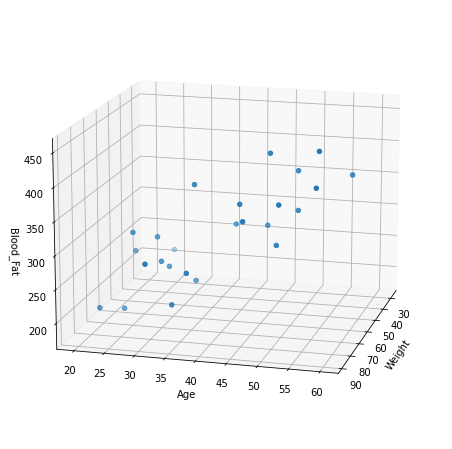

In [112]:
#graph
#figure 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

#산점도
ax.scatter(weight,age, blood)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood_Fat")
ax.view_init(15,15)
plt.show()
